# 가위 바위 보 구분하기

## 0. 목차

- 1. 노드 구현 및 baseline 만들기
- 2. 문제점 파악 및 수정 진행
- 3. 최종 정확도 구현

## 1. 노드 구현 및 baseline 만들기

#### 1.1 라이브러리 불러오기

In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

2.6.0
1.22.2
PIL 라이브러리 import 완료!


#### 1.2 jpg파일 불러오기 및 resize

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

847  images to be resized.
847  images resized.
가위 이미지 resize 완료!


In [3]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

109  images to be resized.
109  images resized.


In [4]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

109  images to be resized.
109  images resized.


In [5]:
import numpy as np

def load_data(img_path, number_of_data=337):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 337 입니다.
x_train shape: (337, 28, 28, 3)
y_train shape: (337,)


라벨:  0


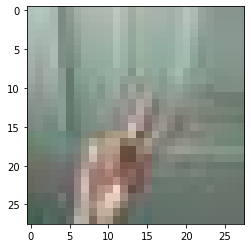

In [6]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (

In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
11/11 [==============================] - 1s 19ms/step - loss: 1.1313 - accuracy: 0.3442
Epoch 2/10
11/11 [==============================] - 0s 20ms/step - loss: 1.1003 - accuracy: 0.3175
Epoch 3/10
11/11 [==============================] - 0s 18ms/step - loss: 1.0926 - accuracy: 0.3709
Epoch 4/10
11/11 [==============================] - 0s 20ms/step - loss: 1.0876 - accuracy: 0.4065
Epoch 5/10
11/11 [==============================] - 0s 20ms/step - loss: 1.0727 - accuracy: 0.5608
Epoch 6/10
11/11 [==============================] - 0s 20ms/step - loss: 1.0569 - accuracy: 0.6202
Epoch 7/10
11/11 [==============================] - 0s 20ms/step - loss: 1.0368 - accuracy: 0.6172
Epoch 8/10
11/11 [==============================] - 0s 23ms/step - loss: 1.0057 - accuracy: 0.5816
Epoch 9/10
11/11 [==============================] - 0s 21ms/step - loss: 0.9953 - accuracy: 0.5252
Epoch 10/10
11/11 [==============================] - 0s 20ms/step - loss: 0.9295 - accuracy: 0.6558


### 1.3 test data 생성

In [14]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test_scissor"
resize_images(test_image_dir_path)

print("가위 이미지 resize 완료!")

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test_rock"
resize_images(test_image_dir_path)
print("바위 이미지 resize 완료!")

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/test_paper"
resize_images(test_image_dir_path)
print("보 이미지 resize 완료!")

def test_load_data(img_path, number_of_data=329):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=test_load_data(test_image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

104  images to be resized.
104  images resized.
가위 이미지 resize 완료!
116  images to be resized.
116  images resized.
바위 이미지 resize 완료!
109  images to be resized.
109  images resized.
보 이미지 resize 완료!
학습데이터(x_test)의 이미지 개수는 329 입니다.
x_test shape: (329, 28, 28, 3)
y_test shape: (329,)


In [12]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

11/11 - 0s - loss: 42.4300 - accuracy: 0.2675
test_loss: 42.429962158203125
test_accuracy: 0.26747721433639526


### baseline 결과
---
- train set
    - X_train : 337개 
    - loss: 0.9295 - accuracy: 0.6558

- test set
    - x_test : 329개
    - loss: 42.4300 - accuracy: 0.2675
    

## 2. 문제점 파악 및 수정 진행

- train data 가 test 데이터에 비해 8개 정도 밖에 차이가 안남.
- 학습하기 위한 데이터셋이 적다고 판단하여 train data 갯수를 늘린 후 재실행

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

847  images to be resized.
847  images resized.
가위 이미지 resize 완료!
499  images to be resized.
499  images resized.
바위 이미지 resize 완료!
520  images to be resized.
520  images resized.
보 이미지 resize 완료!


### 다른 그루분들 자료를 마저 압축해제 하기 위해 /* 사용

- 337개에서 1,866개로 train data 증가

In [6]:
def more_load_data(img_path, number_of_data=1866):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

more_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=more_load_data(more_image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1866 입니다.
x_train shape: (1866, 28, 28, 3)
y_train shape: (1866,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=32
n_channel_2=64
n_dense=128
n_train_epoch=5

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (No

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/5
59/59 [==============================] - 3s 42ms/step - loss: 6.0902 - accuracy: 0.5879
Epoch 2/5
59/59 [==============================] - 2s 37ms/step - loss: 0.2295 - accuracy: 0.9175
Epoch 3/5
59/59 [==============================] - 2s 37ms/step - loss: 0.0715 - accuracy: 0.9839
Epoch 4/5
59/59 [==============================] - 2s 37ms/step - loss: 0.0222 - accuracy: 0.9973
Epoch 5/5
59/59 [==============================] - 2s 36ms/step - loss: 0.0078 - accuracy: 1.0000


In [15]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

11/11 - 0s - loss: 3.3750 - accuracy: 0.3769
test_loss: 3.3750245571136475
test_accuracy: 0.37689968943595886


### 데이터 갯수 증가를 통해 test ACC 26% 에서 37%으로 증가...

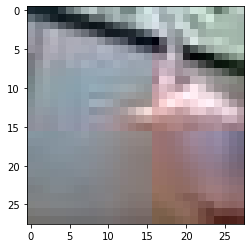

101 번째 이미지는 바로  0 입니다.


In [13]:
index=100     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지는 바로 ',  y_train[index], '입니다.')

## 3. 최종정확도 구현

---

- ACC 37%..
- train data의 모자름, Cross validation 미실행등의 이유로 충분한 학습 및 과적합을 보임(train acc 가 1.000이 나옴)